<h1>What's Federated Learning</h1>
The concept of federated learning is proposed by Google AI on 2016, Their main idea is
to build machine learning models based on data sets that are distributed across multiple devices
while preventing data leakage and sharing data between any two couple of devices. Recent improvements have been focusing on overcoming the statistical challenges, (such as non iid-data and the amount of data hold by each client) and also in improving security in federated learning.
Federated Learning (FL), is highly adapted to the healthcare domain, it's simply used to make a set of hospitals to collaboratively train a joint model, which will be used by all the hospitals after that.
<img src="Images/FL_gen.png"  style="width:600px ;height:600px"> 

<h1>What's Differential Privacy</h1>
Differential Privacy was early introduced by Dwork et al,  The methods of differential privacy, k-anonymity, and
diversification  involve in adding noise to the data, or using generalization methods to obscure
certain sensitive attributes until the third party cannot distinguish the individual, thereby making
the data impossible to be restore to protect user privacy. However, the root of these methods still
require that the data are transmitted elsewhere and these work usually involve a trade-off between
accuracy and privacy. In, most of recents reseach has introduced a differential privacy approach to federated
learning in order to add protection to client-side data by hiding client’s contributions during
training, using differents approaches.
<img src="Images/GDP.png"  style="width:400px ;height:200px"> <img src="Images/LDP.png"  style="width:400px ;height:200px">
 

<h1>Privacy Enhancing Technologies (PETs)</h1>
Privacy-enhancing technologies or PET are designed to prevent data leaks while balancing privacy with usability. Some PETs even prevent bad actors from identifying to whom the collected data belongs - if a leak were to occur, the data would be virtually useless to cybercriminals, and they are mainly digital solutions (Softwares).
There are many different types of PETs, each designed to solve a specific business problem. While some are better at aggregated analytics, others are more suited for precise results. Likewise, some may be ideal for deriving insights from sensitive data, while others are best for data exploration.
we will mention  the following frameworks:
<ul>
    <li>  <a href="https://flower.dev">Flower</a> </li>
    <li>  <a href="https://github.com/OpenMined/PySyft">Pysyft</a> </li>
    <li>  <a href="https://opacus.ai/">Opacus</a></li>
</ul>

<h1> MEDfl</h1>
MEDfl is a new python package, which is a hybridization of Flower and Opacus, while getting inspired by the Pysyft framework, the main strengths of MEDfl is that  both users and developpers will  benifit from  all features of the three listed frameworks.
<h2>A small real world scenario</h2>
<b>Martin</b> is an AI researcher, his main interest is  the applications of AI into the healthcare domain.
Recently, he has obtained a call from a prestigious institute, in order to make a study about the realisation of a new project. The project's goal is  designing and developping a federated learning system between a set of hospitals, and that by training and using a deep learning model with preserving the privacy of all patient records.

When Martin finished the first analysis of the project statement, he realized that the project involve the use of Federated Learning, Differential Privacy within a good storage monitoring system.

Fortunately, Martin knows MEDfl, and he is pretty sure that it's designed for such tasks, and it will be do the desired work.
Medfl with his two main sub-packages,<b>NetManager</b> , <b>Federated</b>, let us designing FL expirements and simulating real world scenarios, and that by using differents options to make  differents FL architectures (or setups) as well as using differents FL pipelines.



<h1> MEDfl</h1>
MEDfl is a new python package, which is a hybridization of Flower and Opacus, while getting inspired by the Pysyft framework, the main strengths of MEDfl is that  both users and developpers will  benifit from  all features of the three listed frameworks.
<h2>A small real world scenario</h2>
<b>Martin</b> is an AI researcher, his main interest is  the applications of AI into the healthcare domain.
Recently, he has recieved a call from a prestigious institute, in order to make a study about the realisation of a new project. The project's goal is  designing and developping a federated learning system between a set of hospitals, and that by training and using a deep learning model with preserving the privacy of all patient records.

When Martin finished the first analysis of the project statement, he realized that the project involve the use of Federated Learning, Differential Privacy within a good storage monitoring system.

Fortunately, Martin knows MEDfl, and he is pretty sure that it's designed for such tasks, and it will be do the desired work.
Medfl with his two main sub-packages,<b>NetManager</b> , <b>Federated</b>, let us designing FL expirements and simulating real world scenarios, and that by using differents options to make  differents FL architectures (or setups) as well as using differents FL pipelines.



<h1>NetManager Sub-Package</h1>
In order ot start simulating, hospitals architectures, their datasets, and theirs interactions. Martin should  familiarize with The NetManager Sub-Package, because, it provides the mechanizmes to :
  <ul>
    <li> Choose the dataset format used by all hospitals, as we are working in a <b>Horizontal Federated Learning HFL</b> settings.  </li>
    <li> Create virtual hospitals in a two way :</li>
    <h5>Automatically : </h5> 
      This method used when Martin doesn't have an idea about hospitals name, their datasets. so, the creation will based on some  variables on the datasets, in our Proof-Of-Concept with the eICU dataset, there are two variables that can be used, "site_hosiptal, and "site_region".  <br> Note that, hospitals can participate for <b>training</b> or for <b>testing</b> only. (this may be changed to support both modes) . <br> the set of hospitals or (Nodes) perform a network, and on MEDfl terminology, a network and its additional informations, refered as a <b>FLsetup (Federated Learning Setup)</b> <br>After the creation of an <b>FLsetup</b> it will be stored on the DB, by a unique ID, a name, a description, and a creation date.
  <h5>Manually :</h5>
      Martin can also create a FLsetup manually, create a network, and add each node separately, then uploade a dataset on each node.
    
  </ul>  
In the following section we will tranlsate all this paragraph to code, and show how powerful and easy to use <b>MEDfl</b> is !
    

<h3> 1) Create a FLsetup Automatically</h3>
To create a FLsetup (network, training nodes and test nodes) manually, with MEDfl, we should follow the following steps: <ul>
    <li>Create a network </li>
    <li>Create the FLsetup object, to make things more organized, and facilitate the storage process</li>
    <li>Create the master dataset table, that contains the dataset that be used to create all the nodes (hospitals).</li>
    <li>Select a column from the dataset, then create training and testing nodes using its modalities (unique values)</li>  
 
</ul>   
 

In [1]:
import sys
sys.path.append('..')

import os
os.environ['PYTHONPATH'] = '..'

In [2]:
!python ../scripts/create_db.py


In [3]:
from Medfl.LearningManager.utils import *
empty_db()

<h4>Network Creation</h4>
The creation of a network in MEDfl, like any object creation in Python, is simply done by calling the Network Class, and create a network object by passing the name of the network. below you find the illustration of the network class, its attributes and functions.
(add class diagram)

In [4]:
from Medfl.NetManager.network import Network
network_obj = Network(name="Auto_network")

print(network_obj.name)


Auto_network


<h4> Master Dataset Table Creation</h4>
To create a the master dataset table, we have to provide a <b>CSV File</b>, that contain the dataset, 
then the "create_master_dataset" function from the Network class, will create a table on the MySQL DB. 
and from this table, we will generate our train/test nodes and datasets. <br>
<b>Note:</b> if the table already exists on the DataBase, the function will retrun an exception message.

In [5]:


network_obj.create_master_dataset()



here
D:\ESI\3CS\PFE\last_year\Code\MEDfl\notebooks\sapsii_score_knnimputed_eicu.csv


<h4>FLsetup Creation</h4>
The same for FLsetup, we call the FLsetup Class, to create a FLsetup object by passing the name of the FLsetup, its description, and the network associated ot it. <br>below you find the illustration of the network class, its attributes and functions. (add class diagramm)

In [6]:
from Medfl.NetManager.flsetup import FLsetup
fl_setup = FLsetup(name = "Flsetup1", description = "The first fl setup",network = network_obj)

<h4>Nodes Creation</h4>
The user should create a parameters dictionary that contains  :
<ul> 
    <li>The name of the column that be used to create the nodes, which is the main element in the <b>Automatic Method</b></li> 
    <li> The lists of the train/test nodes</li>
    </ul> 
and parse it to the create_nodes_from_master_dataset function from the FLsetup class.<br>
Node is also an object, and it will be stored on the DataBase.

In [7]:
params_dict = {'column_name' : 'site_region','train_nodes' : ["Midwest","South"] , 'test_nodes' : ['West','Northeast'] }

eicu_nodes = fl_setup.create_nodes_from_master_dataset(params_dict = params_dict )

[node.name  for node in eicu_nodes]  

['Midwest', 'South', 'West', 'Northeast']

<h4>Federated DataSet</h4>
the function "create_federated_dataset", will create, train loaders, test loaders from the datasets of the nodes.
in the automatic method, the datasets is created from the master dataset table, the trainloader of each node will contains the records with the same name.<br>
After the creation of the federated dataset, the FLsetup will be stored into the FLsetup table in the DB.


In [8]:
fl_dataset = fl_setup.create_federated_dataset()
len(fl_dataset.testloaders[1])

SELECT * FROM MasterDataset WHERE site_region = 'Midwest'
SELECT * FROM MasterDataset WHERE site_region = 'South'
SELECT * FROM MasterDataset WHERE site_region = 'West'
SELECT * FROM MasterDataset WHERE site_region = 'Northeast'


ProgrammingError: (mysql.connector.errors.ProgrammingError) 1054 (42S22): Champ 'FLsetupId' inconnu dans field list
[SQL: UPDATE Networks SET FLsetupId = 1 WHERE NetId = 1]
(Background on this error at: https://sqlalche.me/e/14/f405)

<h3>2) Create a FLsetup Manually</h3>
The manual creation of a FLsetup  with MEDfl, it's a bit different from the the automatic method,but it stays on the same scope, the only difference is here, we should create all the object (FLsetup,network, training nodes and test nodes),
We will start doing the following : <ul>
    <li>Create a network </li>
    <li>Create Master Dataset, Here the master_dataset table will be used to ensure that all nodes hold the same dataset format (horizontal federated learning)</li>
    <li> Create train and test nodes, inside the created network .
    <li> Upload datasets inside each node </li>    
    <li>Create the FLsetup object, to make things more organized, and facilitate the storage process</li>
     
 
</ul>   

<h3>Network Creation</h3>

In [8]:
from Medfl.NetManager.network import Network
network_obj = Network(name="man_network")
network_obj.create_network()

<h3>Nodes creation</h3>
we will create 3 hospitals, two are for training, and the last one is for testing (after the federation, and this by setting the train variable to "1" for the training nodes, and to "0" for the testing Node. <br>
Then we add these nodes to our network.

In [9]:
from Medfl.NetManager.node import Node

hospital_1,hospital_2,hospital_3 = Node(name = "hospital_1", train = 1),Node(name = "hospital_2", train = 1), Node(name = "hospital_3", train = 0) 



<h3>Add this nodes to the network</h3>

In [10]:
network_obj.add_node(hospital_1)
network_obj.add_node(hospital_2)
network_obj.add_node(hospital_3)

<h3>Uploading Datasets into nodes</h3>
To upload a dataset into a node, we have to choose a csv file, then this file will be stored on the DataSet table on the DB.

In [11]:

hospital_1.upload_dataset( dataset_name = "hospital_1_dataset"  )
hospital_2.upload_dataset( dataset_name = "hospital_2_dataset" )
hospital_3.upload_dataset( dataset_name = "hospital_3_dataset"  )

<h3>Create the FLsetup and Generate the federated dataset</h3>

In [12]:
from Medfl.NetManager.flsetup import FLsetup
fl_setup = FLsetup(name = "Manual_Flsetup", description = "The first manual fl setup",network = network_obj)

In [13]:
fl_dataset = fl_setup.create_federated_dataset()
 

<h1>Federated Sub-Package</h1>
Once Martin Finish his work on the architecture of hospitals, and their datasets, He starts thinking on the theoritical side of federated learning of the project, that includes, the machine learning model and its parameters and hyperparameters, the federated learning server and its parameters (number of rounds, number of clients per rounds, the aggregation algorithms, ...etc). <br>
<b>The Federated module</b>  of <b>MEDfl</b>, which is based on the <a href="https://flower.dev/">Flower</a> framework, is well designed for doing this task, it's mainly follows the flower paradigm, but with many customization, to deal with the SQL database, and to be homogeneous with the <b>NetManager</b>

<h2>How it works ?</h2>
The Federated module, can only be used after the creation of an <b>FLsetup</b>, because the FLsetup will generate a federated dataset, which be used by an <b>FLpipeline</b> object.
<h2> The Code</h2>
Let's create a random FLsetup, then use its object to read one of the created FLsetup from the database.

In [14]:
random_flsetup = FLsetup(name = "Random_FLsetup", description = "A random FLsetup",network = Network("Random_net"))

In [15]:
random_flsetup.list_allsetups()

,FLsetupId,name,description,creation_date,NetId,column_name
0,1,Flsetup1,The first fl setup,2023-08-13 18:59:32,1,site_region
1,2,Manual_Flsetup,The first manual fl setup,2023-08-13 18:59:33,2,None


In [16]:
New_flsetup = random_flsetup.read_setup( FLsetupId = 1) # this is not working with auto_net

In [17]:
New_flsetup.network.name

'Auto_network'

In [18]:
New_flsetup.column_name

'site_region'

<h2>Federated DataSet</h2> 
This object has the role of the connector between the <b>NetManager</b> and the <b>Federated</b> modules.<br>
The FLsetup class's function "create_federated_dataset", will go through all nodes,and generate trainloders & valloaders for the train nodes, and testloaders for the test nodes

In [19]:
#here's the reduduncy of feddatasets
fl_dataset = New_flsetup.create_federated_dataset()
fl_dataset.size

SELECT * FROM MasterDataset WHERE site_region = 'Midwest'
SELECT * FROM MasterDataset WHERE site_region = 'South'
SELECT * FROM MasterDataset WHERE site_region = 'West'
SELECT * FROM MasterDataset WHERE site_region = 'Northeast'


17

<h2>Machine Learning </h2>
As MEDfl is based on flower, it has only 3 models based on torch neural nets  :
<ul>
    <li> Binary Classifier </li>
    <li> Multiclass Classifier</li>
    <li> Linear Regressor</li>
</ul>
the choice of the model and all machine learning parameters (learning rate, eopch size, train epochs), should be declared on a YAML file.

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):

    super(BinaryClassifier, self).__init__()
    self.fc1 = nn.Linear(input_dim,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,2*hidden_dim)
    self.fc3 = nn.Linear(2*hidden_dim,output_dim)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))#softmax
    return x
binary_classifier= BinaryClassifier(17,6,1)
optimizer,criterion = optim.SGD(binary_classifier.parameters(), lr=0.0001),nn.BCELoss()
binary_classifier

BinaryClassifier(
  (fc1): Linear(in_features=17, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=1, bias=True)
)

In [21]:
from Medfl.LearningManager.model import Model
global_model = Model(binary_classifier,optimizer,criterion)

<h2>Aggregation Algorithms (Strategy)</h2>
Aggregation algorithms are the mechanizms used by the server to produce a joint unified model, they are known as <b>Strategies</b> on <b>Flower</b>,  in the literature we have many aggregation algorithms, it's true that not all of them are implemented in flower, but we have the most used ones:
 <ul>
    <li><a href = "arxiv.org/abs/1602.05629">Federated Averaging (FedAvg)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Adam (FedAdam)</a></li>
    <li><a href = "arxiv.org/pdf/1803.01498v1.pdf">Federated Median (FedMedian)</a></li>
    <li><a href = "arxiv.org/pdf/1909.06335.pdf">Federated Averaging with Momentum (FedAvgM)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Yogi (FedYogi)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization (FedOpt)</a></li>
    <li><a href = "arxiv.org/abs/1812.06127">Federated Optimization (FedProx)</a></li>
    <li><a href = "openreview.net/pdf?id=ByexElSYDr">FAIR RESOURCE ALLOCATION IN FEDERATED LEARNING (QFedAvg)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Adagrad (FedAdagrad)</a></li>
 </ul>
We can also find them on the strategy directory on Flower.

In [22]:
import flwr as fl
dir(fl.server.strategy)

['FaultTolerantFedAvg',
 'FedAdagrad',
 'FedAdam',
 'FedAvg',
 'FedAvgAndroid',
 'FedAvgM',
 'FedMedian',
 'FedOpt',
 'FedProx',
 'FedYogi',
 'QFedAvg',
 'Strategy',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'aggregate',
 'fault_tolerant_fedavg',
 'fedadagrad',
 'fedadam',
 'fedavg',
 'fedavg_android',
 'fedavgm',
 'fedmedian',
 'fedopt',
 'fedprox',
 'fedyogi',
 'qfedavg',
 'strategy']

The creation of a strategy is based on the "Strategy" Class, it's enough to pass the name of one of the mentionned strategies, and other federated learning parameters which are used during federation rounds.
<ul>
    <li>fraction_fit : the fraction of clients to sample in order  to train the model </li>
    <li>fraction_evaluate  : the fraction of clients to sample in order to evaluate the model (validation) </li>
    <li>min_fit_clients :  the minimum number of clients to sample for the training on each round</li>
    <li>min_evaluate_clients : the minimum number of clients to be sampled for the evaluation on each round </li>
    <li>min_available_clients : the minimum  required number of available clients to start a federation round </li>
<ul>

In [23]:
from Medfl.LearningManager.strategy import Strategy
fed_avg = Strategy("FedAvg", fraction_fit = 1.0 ,fraction_evaluate = 1.0,min_fit_clients = 2,min_evaluate_clients = 2,min_available_clients = 2)

<h3>Federated Learning Server</h3>
The server in the FL terminology, is the set of the mechanizms that orchestrate  all the FL processes, (distributing the model to  clients, getting the models updates from clients, aggregate these updates. <br>
<b>Remark :</b> The FL ServerIt has no relation ! with webservers or any other server concepts.
<h4>MEDfl server</h4>
The FL server on MEDfl, is based on the server class of Flower, but with our customization, because <b>we have added</b> a gradient perturbing feature using <b> Opacus</b>, so we can make the FLpipeline <b>differentially private </b> <br>
The FLserver in MEDfl, has the follwoing attributes : 
<ul>
    <li> global_model : The global model
    <li> strategy : The  aggregation strategy
    <li> num_rounds : The number of federation rounds
    <li> num_clients : The number of train nodes
    <li>dataset : The federated dataset generated by an FLsetup
    <li> diff_privacy : a boolean variable to  enable (disable) the Differentially Private training mode
</ul>

In [24]:
#Create a server
from Medfl.LearningManager.server import *

server = FlowerServer(global_model, strategy = fed_avg, num_rounds = 10, num_clients  = len(fl_dataset.trainloaders), fed_dataset = fl_dataset,diff_privacy = False)

<h3>The federated learning pipeline (FLpipeline)</h3>

In [25]:
#Create a pipeline
from Medfl.LearningManager.flpipeline import *
ppl_1 = FLpipeline( name ="the first fl_pipeline",description = "this is our first FL pipeline",server = server)
ppl_1.server.run()

INFO flwr 2023-08-13 18:59:35,020 | app.py:145 | Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
08/13/2023 18:59:35:INFO:Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
2023-08-13 18:59:37,438	INFO worker.py:1518 -- Started a local Ray instance.
INFO flwr 2023-08-13 18:59:39,904 | app.py:179 | Flower VCE: Ray initialized with resources: {'memory': 3877910939.0, 'object_store_memory': 1938955468.0, 'CPU': 4.0, 'node:192.168.43.27': 1.0}
08/13/2023 18:59:39:INFO:Flower VCE: Ray initialized with resources: {'memory': 3877910939.0, 'object_store_memory': 1938955468.0, 'CPU': 4.0, 'node:192.168.43.27': 1.0}
INFO flwr 2023-08-13 18:59:39,907 | server.py:86 | Initializing global parameters
08/13/2023 18:59:39:INFO:Initializing global parameters
INFO flwr 2023-08-13 18:59:39,909 | server.py:266 | Using initial parameters provided by strategy
08/13/2023 18:59:39:INFO:Using initial parameters provided by strategy
INFO flwr 

Server-side evaluation loss 0.017398996390312983 / accuracy 0.8325892857142857
(launch_and_fit pid=110910) [Client 0] fit, config: {}
(launch_and_fit pid=110911) [Client 1] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.554890 Acc@1: 8.437500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.474111 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.481187 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.495447 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.494604 Acc@1: 0.468750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.501255 Acc@1: 0.375000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.555813 Acc@1: 4.218750
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.552366 Acc@1: 6.770833
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.550716 Acc@1: 7.421875
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.550599 Acc@1: 5.937500
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 

(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.491974 Acc@1: 2.901786
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.494254 Acc@1: 2.539062
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.499108 Acc@1: 2.256944
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.500982 Acc@1: 2.031250
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.501199 Acc@1: 1.846591
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.473200 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.480286 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.552620 Acc@1: 8.437500
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.553360 Acc@1: 4.218750
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.549874 Acc@1: 6.770833
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.548226 Acc@1: 7.421875
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.548209 Acc@1: 5.937500
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.546310 Acc@1: 4.947917
(launch_and_

DEBUG flwr 2023-08-13 18:59:45,093 | server.py:229 | fit_round 1 received 2 results and 0 failures
08/13/2023 18:59:45:DEBUG:fit_round 1 received 2 results and 0 failures
WARNING flwr 2023-08-13 18:59:45,099 | fedavg.py:242 | No fit_metrics_aggregation_fn provided
08/13/2023 18:59:45:WARNING:No fit_metrics_aggregation_fn provided
INFO flwr 2023-08-13 18:59:45,132 | server.py:116 | fit progress: (1, 0.017251810152753653, {'accuracy': 0.8415178571428571}, 5.1462639500095975)
08/13/2023 18:59:45:INFO:fit progress: (1, 0.017251810152753653, {'accuracy': 0.8415178571428571}, 5.1462639500095975)
DEBUG flwr 2023-08-13 18:59:45,134 | server.py:165 | evaluate_round 1: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.489356 Acc@1: 2.901786
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.491666 Acc@1: 2.539062
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.496793 Acc@1: 2.256944
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.498788 Acc@1: 2.031250
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.498990 Acc@1: 1.846591
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.470522 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.477546 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.492396 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.491437 Acc@1: 0.468750
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.498451 Acc@1: 0.375000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.489164 Acc@1: 1.875000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.488829 Acc@1: 2.901786
Server-side evaluation loss 0.017251810152753653 / accuracy 0.8415178571428571


08/13/2023 18:59:45:DEBUG:evaluate_round 1: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-13 18:59:45,201 | server.py:179 | evaluate_round 1 received 2 results and 0 failures
08/13/2023 18:59:45:DEBUG:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2023-08-13 18:59:45,204 | fedavg.py:273 | No evaluate_metrics_aggregation_fn provided
08/13/2023 18:59:45:WARNING:No evaluate_metrics_aggregation_fn provided
DEBUG flwr 2023-08-13 18:59:45,208 | server.py:215 | fit_round 2: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:45:DEBUG:fit_round 2: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.491144 Acc@1: 2.539062
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.496320 Acc@1: 2.256944
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.498332 Acc@1: 2.031250
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.498527 Acc@1: 1.846591
(launch_and_fit pid=110910) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=110910) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 1] evaluate, config: {}
(launch_and_fit pid=110910) [Client 0] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.469487 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.476822 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.492327 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.491279 Acc@1: 2.890625
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.498499 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.488786 Acc@1: 3.4895

(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_fit pid=110911) [Client 1] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.547478 Acc@1: 8.437500
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.547543 Acc@1: 4.218750
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.544042 Acc@1: 6.770833
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.542498 Acc@1: 7.421875
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.542786 Acc@1: 5.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.488413 Acc@1: 4.285714
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.490742 Acc@1: 3.750000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.496145 Acc@1: 3.333333
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.498300 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.540627 Acc@1: 4.947917
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.548603 Acc@1: 4.241071
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.550596 Acc@1: 4.613715
(launch_and_fit pid=110911) 	Trai

(raylet) [2023-08-13 18:59:46,415 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938091520; capacity: 250375106560. Object creation will fail if spilling is required.
DEBUG flwr 2023-08-13 18:59:46,522 | server.py:229 | fit_round 2 received 2 results and 0 failures
08/13/2023 18:59:46:DEBUG:fit_round 2 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:46,550 | server.py:116 | fit progress: (2, 0.017161760398809858, {'accuracy': 0.8459821428571429}, 6.56416268699104)
08/13/2023 18:59:46:INFO:fit progress: (2, 0.017161760398809858, {'accuracy': 0.8459821428571429}, 6.56416268699104)
DEBUG flwr 2023-08-13 18:59:46,552 | server.py:165 | evaluate_round 2: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:46:DEBUG:evaluate_round 2: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.487165 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.486829 Acc@1: 4.285714
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.489163 Acc@1: 3.750000
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.494592 Acc@1: 3.333333
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.496717 Acc@1: 3.000000
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.496900 Acc@1: 2.727273
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.467927 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.474798 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.490063 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.489029 Acc@1: 2.890625
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.496347 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.486768 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.486440 Acc@1: 4.285714
(launch_and_

DEBUG flwr 2023-08-13 18:59:46,621 | server.py:179 | evaluate_round 2 received 2 results and 0 failures
08/13/2023 18:59:46:DEBUG:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:46,623 | server.py:215 | fit_round 3: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:46:DEBUG:fit_round 3: strategy sampled 2 clients (out of 2)
(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training

(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.496502 Acc@1: 2.727273
(launch_and_fit pid=110910) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=110910) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 1] evaluate, config: {}
(launch_and_fit pid=110910) [Client 1] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.543972 Acc@1: 10.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.543421 Acc@1: 5.000000
(launch_and_fit pid=110911) [Client 0] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.467347 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.474564 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.539983 Acc@1: 7.291667
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.538559 Acc@1: 7.812500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.539095 Acc@1: 6.250000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.536723 Acc@1: 5.208333
(launch_and_fit p

DEBUG flwr 2023-08-13 18:59:47,780 | server.py:229 | fit_round 3 received 2 results and 0 failures
08/13/2023 18:59:47:DEBUG:fit_round 3 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:47,809 | server.py:116 | fit progress: (3, 0.01707939006727662, {'accuracy': 0.8482142857142857}, 7.823217880009906)
08/13/2023 18:59:47:INFO:fit progress: (3, 0.01707939006727662, {'accuracy': 0.8482142857142857}, 7.823217880009906)
DEBUG flwr 2023-08-13 18:59:47,811 | server.py:165 | evaluate_round 3: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:47:DEBUG:evaluate_round 3: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.494966 Acc@1: 2.312500
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.485234 Acc@1: 3.489583
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.484911 Acc@1: 4.285714
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.487259 Acc@1: 3.750000
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.492845 Acc@1: 3.333333
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.495012 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.495153 Acc@1: 2.727273
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.466209 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.472717 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.488095 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.487019 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.494535 Acc@1: 2.312500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.484856 Acc@1: 3.489583
(launch_and_

DEBUG flwr 2023-08-13 18:59:47,887 | server.py:179 | evaluate_round 3 received 2 results and 0 failures
08/13/2023 18:59:47:DEBUG:evaluate_round 3 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:47,889 | server.py:215 | fit_round 4: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:47:DEBUG:fit_round 4: strategy sampled 2 clients (out of 2)
(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training

(launch_and_evaluate pid=110910) [Client 1] evaluate, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.494736 Acc@1: 2.727273
(launch_and_fit pid=110911) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=110911) [Client 0] evaluate, config: {}
(launch_and_fit pid=110910) [Client 0] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.465858 Acc@1: 0.000000
(launch_and_fit pid=110911) [Client 1] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.541888 Acc@1: 10.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.472732 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.540883 Acc@1: 5.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.488801 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.487623 Acc@1: 2.890625
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.495350 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.485202 Acc@1: 3.489583
(launch_and_fit p

(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.483493 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.483180 Acc@1: 4.285714
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.485527 Acc@1: 3.750000
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.491205 Acc@1: 3.333333
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.493373 Acc@1: 3.000000
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.493464 Acc@1: 2.727273
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.464852 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.470887 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.486251 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.485150 Acc@1: 2.890625
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.492808 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.483120 Acc@1: 3.489583


DEBUG flwr 2023-08-13 18:59:49,289 | server.py:229 | fit_round 4 received 2 results and 0 failures
08/13/2023 18:59:49:DEBUG:fit_round 4 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:49,322 | server.py:116 | fit progress: (4, 0.016998462646985225, {'accuracy': 0.8482142857142857}, 9.336165226006415)
08/13/2023 18:59:49:INFO:fit progress: (4, 0.016998462646985225, {'accuracy': 0.8482142857142857}, 9.336165226006415)
DEBUG flwr 2023-08-13 18:59:49,324 | server.py:165 | evaluate_round 4: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:49:DEBUG:evaluate_round 4: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-13 18:59:49,379 | server.py:179 | evaluate_round 4 received 2 results and 0 failures
08/13/2023 18:59:49:DEBUG:evaluate_round 4 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:49,381 | server.py:215 | fit_round 5: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:49:DEBUG:fit_round 5: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.482815 Acc@1: 4.285714
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.485160 Acc@1: 3.750000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.490820 Acc@1: 3.333333
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.492964 Acc@1: 3.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.493041 Acc@1: 2.727273
(launch_and_fit pid=110910) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.016998462646985225 / accuracy 0.8482142857142857


(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_evaluate pid=110910) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 1] evaluate, config: {}
(launch_and_fit pid=110910) [Client 0] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.464625 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.471027 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.487056 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.485863 Acc@1: 2.890625
(launch_and_fit pid=110911) [Client 1] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.540365 Acc@1: 10.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.538957 Acc@1: 5.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.535806 Acc@1: 7.291667
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.534629 Acc@1: 7.812500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.493726 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.483576 Acc@1: 3.489583

DEBUG flwr 2023-08-13 18:59:50,670 | server.py:229 | fit_round 5 received 2 results and 0 failures
08/13/2023 18:59:50:DEBUG:fit_round 5 received 2 results and 0 failures


(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.481864 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.481560 Acc@1: 4.285714
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.483903 Acc@1: 3.750000
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.489636 Acc@1: 3.333333
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.491793 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.540919 Acc@1: 4.809028
(launch_and_fit pid=110911) epsilon of client 1 : eps = 0
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.491842 Acc@1: 2.727273
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.463629 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.469244 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.484487 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.483388 Acc@1: 2.890625
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.491165 Acc@1: 2.312500


INFO flwr 2023-08-13 18:59:50,704 | server.py:116 | fit progress: (5, 0.01692147084849058, {'accuracy': 0.8459821428571429}, 10.718403542996384)
08/13/2023 18:59:50:INFO:fit progress: (5, 0.01692147084849058, {'accuracy': 0.8459821428571429}, 10.718403542996384)
DEBUG flwr 2023-08-13 18:59:50,706 | server.py:165 | evaluate_round 5: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:50:DEBUG:evaluate_round 5: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-13 18:59:50,763 | server.py:179 | evaluate_round 5 received 2 results and 0 failures
08/13/2023 18:59:50:DEBUG:evaluate_round 5 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:50,766 | server.py:215 | fit_round 6: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:50:DEBUG:fit_round 6: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.481501 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.481205 Acc@1: 4.285714
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.483546 Acc@1: 3.750000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.489255 Acc@1: 3.333333
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.491388 Acc@1: 3.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.491422 Acc@1: 2.727273
(launch_and_fit pid=110910) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.01692147084849058 / accuracy 0.8459821428571429
(launch_and_evaluate pid=110910) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 1] evaluate, config: {}


(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_fit pid=110910) [Client 1] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.539110 Acc@1: 10.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.537348 Acc@1: 8.593750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.534377 Acc@1: 9.687500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.533319 Acc@1: 7.265625
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.534346 Acc@1: 5.812500
(launch_and_fit pid=110911) [Client 0] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.463462 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.469401 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.485313 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.484109 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.492077 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.531745 Acc@1: 4.843750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.

DEBUG flwr 2023-08-13 18:59:52,238 | server.py:229 | fit_round 6 received 2 results and 0 failures
08/13/2023 18:59:52:DEBUG:fit_round 6 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:52,272 | server.py:116 | fit progress: (6, 0.016846217375865086, {'accuracy': 0.8459821428571429}, 12.285854546993505)
08/13/2023 18:59:52:INFO:fit progress: (6, 0.016846217375865086, {'accuracy': 0.8459821428571429}, 12.285854546993505)
DEBUG flwr 2023-08-13 18:59:52,273 | server.py:165 | evaluate_round 6: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:52:DEBUG:evaluate_round 6: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-13 18:59:52,331 | server.py:179 | evaluate_round 6 received 2 results and 0 failures
08/13/2023 18:59:52:DEBUG:evaluate_round 6 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:52,333 | server.py:215 | fit_round 7: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:52:DEBUG:fit_round 7: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.462597 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.467713 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.482765 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.481700 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.489599 Acc@1: 2.312500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.479980 Acc@1: 3.489583
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.479693 Acc@1: 4.285714
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.482025 Acc@1: 3.750000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.487766 Acc@1: 3.333333
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.489873 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.489864 Acc@1: 2.727273
(launch_and_fit pid=110911) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.016846217375865086 / accuracy 0.8459821428571429


(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_evaluate pid=110910) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 0] evaluate, config: {}
(launch_and_fit pid=110910) [Client 1] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.537990 Acc@1: 10.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.535907 Acc@1: 8.593750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.533137 Acc@1: 9.687500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.532184 Acc@1: 7.265625
(launch_and_fit pid=110911) [Client 0] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.462414 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.467865 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.483567 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.482399 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.490488 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.533346 Acc@1: 5.812500

DEBUG flwr 2023-08-13 18:59:53,502 | server.py:229 | fit_round 7 received 2 results and 0 failures
08/13/2023 18:59:53:DEBUG:fit_round 7 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:53,538 | server.py:116 | fit progress: (7, 0.016776494628233874, {'accuracy': 0.8482142857142857}, 13.552332204999402)
08/13/2023 18:59:53:INFO:fit progress: (7, 0.016776494628233874, {'accuracy': 0.8482142857142857}, 13.552332204999402)
DEBUG flwr 2023-08-13 18:59:53,540 | server.py:165 | evaluate_round 7: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:53:DEBUG:evaluate_round 7: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-13 18:59:53,618 | server.py:179 | evaluate_round 7 received 2 results and 0 failures
08/13/2023 18:59:53:DEBUG:evaluate_round 7 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:53,622 | server.py:215 | fit_round 8: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:53:DEBUG:fit_round 8: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.480110 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.488110 Acc@1: 2.312500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.478549 Acc@1: 3.489583
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.478285 Acc@1: 4.285714
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.480608 Acc@1: 3.750000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.486380 Acc@1: 3.333333
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.488466 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.488412 Acc@1: 2.727273
Server-side evaluation loss 0.016776494628233874 / accuracy 0.8482142857142857
(launch_and_evaluate pid=110910) [Client 1] evaluate, config: {}
(launch_and_fit pid=110911) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=110911) [Client 0] evaluate, config: {}


(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_fit pid=110910) [Client 1] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.537025 Acc@1: 10.000000
(launch_and_fit pid=110911) [Client 0] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.461483 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.534605 Acc@1: 8.593750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.532028 Acc@1: 9.687500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.531171 Acc@1: 7.265625
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.532438 Acc@1: 5.812500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.529790 Acc@1: 4.843750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.538565 Acc@1: 4.151786
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.466405 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.481902 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.480759 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.

DEBUG flwr 2023-08-13 18:59:54,889 | server.py:229 | fit_round 8 received 2 results and 0 failures
08/13/2023 18:59:54:DEBUG:fit_round 8 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:54,922 | server.py:116 | fit progress: (8, 0.016711656245396292, {'accuracy': 0.8482142857142857}, 14.936095826007659)
08/13/2023 18:59:54:INFO:fit progress: (8, 0.016711656245396292, {'accuracy': 0.8482142857142857}, 14.936095826007659)
DEBUG flwr 2023-08-13 18:59:54,924 | server.py:165 | evaluate_round 8: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:54:DEBUG:evaluate_round 8: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.477219 Acc@1: 4.285714
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.479533 Acc@1: 3.750000
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.485359 Acc@1: 3.333333
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.487449 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.487361 Acc@1: 2.727273
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.460705 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.464819 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.479537 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.478556 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.486675 Acc@1: 2.312500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.477175 Acc@1: 3.489583
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.476928 Acc@1: 4.285714
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.479238 Acc@1: 3.750000
(launch_and_

DEBUG flwr 2023-08-13 18:59:55,038 | server.py:179 | evaluate_round 8 received 2 results and 0 failures
08/13/2023 18:59:55:DEBUG:evaluate_round 8 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:55,040 | server.py:215 | fit_round 9: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:55:DEBUG:fit_round 9: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.487109 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.487004 Acc@1: 2.727273
(launch_and_fit pid=110911) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=110910) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 0] evaluate, config: {}


(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_fit pid=110910) [Client 1] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.536206 Acc@1: 10.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.533446 Acc@1: 8.593750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.531027 Acc@1: 9.687500
(launch_and_fit pid=110911) [Client 0] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.460572 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.464981 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.530260 Acc@1: 7.265625
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.531615 Acc@1: 5.812500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.528958 Acc@1: 4.843750
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.537733 Acc@1: 4.151786
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.539441 Acc@1: 4.535590
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.535715 Acc@1: 10.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0

DEBUG flwr 2023-08-13 18:59:56,100 | server.py:229 | fit_round 9 received 2 results and 0 failures
08/13/2023 18:59:56:DEBUG:fit_round 9 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:56,134 | server.py:116 | fit progress: (9, 0.01665036819821639, {'accuracy': 0.8482142857142857}, 16.147622804011917)
08/13/2023 18:59:56:INFO:fit progress: (9, 0.01665036819821639, {'accuracy': 0.8482142857142857}, 16.147622804011917)
DEBUG flwr 2023-08-13 18:59:56,136 | server.py:165 | evaluate_round 9: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:56:DEBUG:evaluate_round 9: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-13 18:59:56,197 | server.py:179 | evaluate_round 9 received 2 results and 0 failures
08/13/2023 18:59:56:DEBUG:evaluate_round 9 received 2 results and 0 failures
DEBUG flwr 2023-08-13 18:59:56,201 | server.py:215 | fit_round 10: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:56:DEBUG:fit_round 10: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.537495 Acc@1: 4.535590
(launch_and_fit pid=110910) epsilon of client 1 : eps = 0
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.475962 Acc@1: 4.285714
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.478256 Acc@1: 3.750000
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.484110 Acc@1: 3.333333
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.486172 Acc@1: 3.000000
(launch_and_fit pid=110911) 	Train Epoch: 4 	Loss: 0.486033 Acc@1: 2.727273
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.459828 Acc@1: 0.000000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.463488 Acc@1: 0.937500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.478051 Acc@1: 0.625000
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.477120 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.485345 Acc@1: 2.312500
(launch_and_fit pid=110911) 	Train Epoch: 5 	Loss: 0.475906 Acc@1: 3.489583
(launch_and_fit pid=110911) 	T

(launch_and_fit pid=110910) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110910)   warnings.warn(
(launch_and_fit pid=110911) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=110911)   warnings.warn(


(launch_and_evaluate pid=110910) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 0] evaluate, config: {}
(launch_and_fit pid=110910) [Client 0] fit, config: {}
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.459689 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.463626 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.478746 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.477718 Acc@1: 2.890625
(launch_and_fit pid=110911) [Client 1] fit, config: {}
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.535385 Acc@1: 10.000000
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.532315 Acc@1: 8.593750
(launch_and_fit pid=110911) 	Train Epoch: 0 	Loss: 0.530062 Acc@1: 9.687500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.486109 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.476279 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.476009 Acc@1: 4.285714

(raylet) [2023-08-13 18:59:56,427 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938034176; capacity: 250375106560. Object creation will fail if spilling is required.


(launch_and_fit pid=110910) 	Train Epoch: 0 	Loss: 0.486382 Acc@1: 2.727273
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.459530 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.463306 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.478235 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.477249 Acc@1: 2.890625
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.534926 Acc@1: 10.000000
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.531729 Acc@1: 8.593750
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.529479 Acc@1: 9.687500
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.528818 Acc@1: 7.265625
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.530304 Acc@1: 5.812500
(launch_and_fit pid=110911) 	Train Epoch: 1 	Loss: 0.527591 Acc@1: 4.843750
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.485610 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 1 	Loss: 0.475902 Acc@1: 3.489583
(launch_and

DEBUG flwr 2023-08-13 18:59:57,267 | server.py:229 | fit_round 10 received 2 results and 0 failures
08/13/2023 18:59:57:DEBUG:fit_round 10 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:57,304 | server.py:116 | fit progress: (10, 0.016592619480560723, {'accuracy': 0.8482142857142857}, 17.31841287401039)
08/13/2023 18:59:57:INFO:fit progress: (10, 0.016592619480560723, {'accuracy': 0.8482142857142857}, 17.31841287401039)
DEBUG flwr 2023-08-13 18:59:57,306 | server.py:165 | evaluate_round 10: strategy sampled 2 clients (out of 2)
08/13/2023 18:59:57:DEBUG:evaluate_round 10: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.484421 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.474981 Acc@1: 3.489583
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.474782 Acc@1: 4.151786
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.477058 Acc@1: 3.632813
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.482944 Acc@1: 3.229167
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.484978 Acc@1: 2.906250
(launch_and_fit pid=110910) 	Train Epoch: 4 	Loss: 0.484799 Acc@1: 2.642045
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.459034 Acc@1: 0.000000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.462255 Acc@1: 0.937500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.476649 Acc@1: 0.625000
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.475778 Acc@1: 2.890625
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.484084 Acc@1: 2.312500
(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.474710 Acc@1: 3.489583
(launch_and_

DEBUG flwr 2023-08-13 18:59:57,385 | server.py:179 | evaluate_round 10 received 2 results and 0 failures
08/13/2023 18:59:57:DEBUG:evaluate_round 10 received 2 results and 0 failures
INFO flwr 2023-08-13 18:59:57,387 | server.py:144 | FL finished in 17.401358758012066
08/13/2023 18:59:57:INFO:FL finished in 17.401358758012066
INFO flwr 2023-08-13 18:59:57,391 | app.py:202 | app_fit: losses_distributed [(1, 0.017219677607981487), (2, 0.017116526354662993), (3, 0.017039887881203475), (4, 0.016974003414646457), (5, 0.016914798372550166), (6, 0.016857734668590457), (7, 0.016804726320755595), (8, 0.016755397117219163), (9, 0.016709252916422928), (10, 0.016665192624957387)]
08/13/2023 18:59:57:INFO:app_fit: losses_distributed [(1, 0.017219677607981487), (2, 0.017116526354662993), (3, 0.017039887881203475), (4, 0.016974003414646457), (5, 0.016914798372550166), (6, 0.016857734668590457), (7, 0.016804726320755595), (8, 0.016755397117219163), (9, 0.016709252916422928), (10, 0.016665192624957387)

(launch_and_fit pid=110910) 	Train Epoch: 5 	Loss: 0.484486 Acc@1: 2.642045
(launch_and_fit pid=110910) epsilon of client 0 : eps = 0


(launch_and_evaluate pid=110910) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=110911) [Client 1] evaluate, config: {}


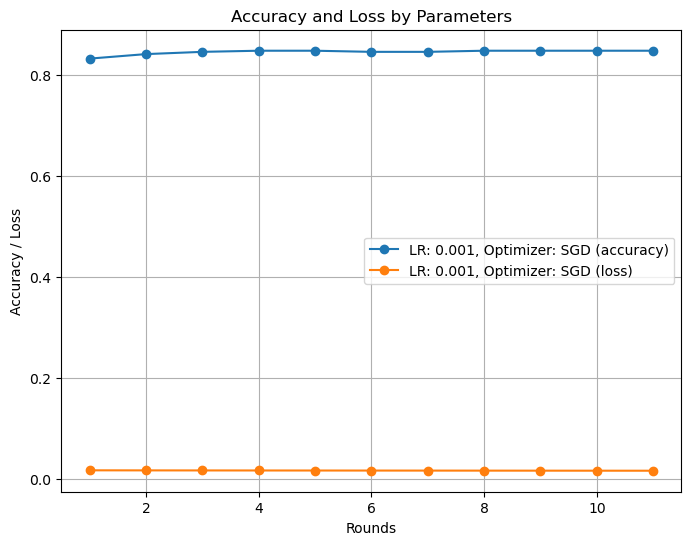

In [26]:
# making some plots
from Medfl.LearningManager.plot import AccuracyLossPlotter

global_accuracy,global_loss = ppl_1.server.accuracies,ppl_1.server.losses
results_dict = {
    ('LR: 0.001, Optimizer: SGD', 'accuracy'): global_accuracy,
    ('LR: 0.001, Optimizer: SGD', 'loss'): global_loss
}
plotter = AccuracyLossPlotter(results_dict)
plotter.plot_accuracy_loss()

In [27]:
ppl_1.auto_test()

/home/hlpc/Desktop/Github/MEDfl/Medfl/LearningManager/utils.py:23: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (sen * ppv) / (sen + ppv)


[{'node_name': 'Midwest',
  'classification_report': "{'confusion matrix': {'TP': 0, 'FP': 4, 'FN': 157, 'TN': 882}, 'Accuracy': 0.846, 'Sensitivity/Recall': 0.0, 'Specificity': 0.995, 'PPV/Precision': 0.0, 'NPV': 0.849, 'F1-score': nan, 'False positive rate': 0.005, 'True positive rate': 0.0}"},
 {'node_name': 'South',
  'classification_report': "{'confusion matrix': {'TP': 1, 'FP': 10, 'FN': 136, 'TN': 561}, 'Accuracy': 0.794, 'Sensitivity/Recall': 0.007, 'Specificity': 0.982, 'PPV/Precision': 0.091, 'NPV': 0.805, 'F1-score': 0.014, 'False positive rate': 0.018, 'True positive rate': 0.007}"},
 {'node_name': 'West',
  'classification_report': "{'confusion matrix': {'TP': 2, 'FP': 30, 'FN': 546, 'TN': 2323}, 'Accuracy': 0.801, 'Sensitivity/Recall': 0.004, 'Specificity': 0.987, 'PPV/Precision': 0.062, 'NPV': 0.81, 'F1-score': 0.007, 'False positive rate': 0.013, 'True positive rate': 0.004}"},
 {'node_name': 'Northeast',
  'classification_report': "{'confusion matrix': {'TP': 9, 'FP': 

(raylet) [2023-08-13 19:00:06,435 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938038272; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:00:16,440 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937976832; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:00:26,446 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937976832; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:00:36,452 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937964544; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:05:06,618 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937362432; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:05:16,627 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937317376; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:05:26,634 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937300992; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:05:36,640 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937538560; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:10:06,818 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936821760; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:10:16,824 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936772608; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:10:26,830 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936739840; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:10:36,840 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936723456; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:15:07,028 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936408064; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:15:17,039 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6939762688; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:15:27,045 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6939754496; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:15:37,051 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6939742208; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:20:07,234 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936207360; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:20:17,240 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936195072; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:20:27,246 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936186880; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:20:37,252 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936174592; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:25:07,398 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6935662592; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:25:17,403 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6935760896; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:25:27,408 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6935699456; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:25:37,413 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6935711744; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:30:07,592 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934978560; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:30:17,598 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934986752; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:30:27,604 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934994944; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:30:37,609 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934958080; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:35:07,810 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934716416; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:35:17,816 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934704128; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:35:27,822 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934827008; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:35:37,828 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934765568; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:40:08,016 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936670208; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:40:18,023 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936641536; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:40:28,030 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936637440; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:40:38,035 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936584192; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:45:08,221 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938435584; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:45:18,228 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938427392; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:45:28,235 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938435584; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:45:38,242 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6938402816; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:50:08,434 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937780224; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:50:18,440 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937776128; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:50:28,446 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937755648; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:50:38,452 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937726976; capacity: 250375106560. Object 

(raylet) [2023-08-13 19:55:08,612 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936956928; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:55:18,617 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936952832; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:55:28,621 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936952832; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 19:55:38,626 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936911872; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:00:08,786 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937067520; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:00:18,792 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937059328; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:00:28,798 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937149440; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:00:38,804 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6937120768; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:05:08,958 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936453120; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:05:18,969 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936449024; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:05:28,976 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936395776; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:05:38,984 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6936305664; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:10:09,152 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934913024; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:10:19,158 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934908928; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:10:29,163 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934900736; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:10:39,169 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6934417408; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:15:09,351 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932393984; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:15:19,367 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933463040; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:15:29,373 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933409792; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:15:39,380 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933319680; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:20:09,553 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932996096; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:20:19,560 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932983808; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:20:29,566 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932996096; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:20:39,572 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932979712; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:25:09,760 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932725760; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:25:19,766 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932729856; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:25:29,771 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932721664; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:25:39,777 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932705280; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:30:09,942 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932082688; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:30:19,947 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932074496; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:30:29,953 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932074496; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:30:39,958 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932025344; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:35:10,162 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932463616; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:35:20,169 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932447232; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:35:30,175 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932443136; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:35:40,181 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932414464; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:40:10,361 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931804160; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:40:20,369 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931800064; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:40:30,378 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931775488; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:40:40,393 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931886080; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:45:10,579 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932119552; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:45:20,585 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932115456; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:45:30,591 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932115456; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:45:40,597 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932045824; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:50:10,767 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931804160; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:50:20,774 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931755008; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:50:30,779 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931750912; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:50:40,785 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931689472; capacity: 250375106560. Object 

(raylet) [2023-08-13 20:55:10,951 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931419136; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:55:20,957 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931415040; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:55:30,963 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931386368; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 20:55:40,969 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931456000; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:00:11,170 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932037632; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:00:21,178 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932037632; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:00:31,202 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6932000768; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:00:41,209 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931972096; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:05:11,400 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930882560; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:05:21,412 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931628032; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:05:31,418 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931435520; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:05:41,424 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6931419136; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:10:11,616 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930612224; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:10:21,623 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930587648; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:10:31,630 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930575360; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:10:41,638 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930542592; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:15:11,819 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933217280; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:15:21,825 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933217280; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:15:31,831 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933188608; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:15:41,838 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6933151744; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:20:12,021 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930915328; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:20:22,029 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930903040; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:20:32,035 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930898944; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:20:42,041 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930833408; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:25:12,219 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930386944; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:25:22,226 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930386944; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:25:32,233 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930354176; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:25:42,239 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6930317312; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:30:12,408 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929383424; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:30:22,414 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929350656; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:30:32,419 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929342464; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:30:42,425 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929272832; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:35:12,604 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929014784; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:35:22,611 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929002496; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:35:32,617 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929010688; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:35:42,623 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928957440; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:40:12,786 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928945152; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:40:22,792 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928949248; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:40:32,800 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928891904; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:40:42,806 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928859136; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:45:12,978 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929379328; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:45:22,983 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929383424; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:45:32,989 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929350656; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:45:42,997 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6929289216; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:50:13,159 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928691200; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:50:23,165 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928670720; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:50:33,171 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928670720; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:50:43,178 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928609280; capacity: 250375106560. Object 

(raylet) [2023-08-13 21:55:13,347 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928175104; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:55:23,353 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928171008; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:55:33,360 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928166912; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 21:55:43,365 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6928130048; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:00:13,534 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6927245312; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:00:23,540 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6927245312; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:00:33,546 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6927237120; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:00:43,551 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6927208448; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:05:13,719 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926315520; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:05:23,725 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926315520; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:05:33,731 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926311424; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:05:43,738 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926278656; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:10:13,907 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926204928; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:10:23,915 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926176256; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:10:33,921 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926176256; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:10:43,927 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926139392; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:15:14,105 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926700544; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:15:24,111 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926688256; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:15:34,118 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926659584; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:15:44,124 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926626816; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:20:14,315 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926753792; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:20:24,324 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926749696; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:20:34,330 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926712832; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:20:44,337 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926680064; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:25:14,506 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926204928; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:25:24,512 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926200832; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:25:34,518 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926196736; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:25:44,524 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926127104; capacity: 250375106560. Object 

(raylet) [2023-08-13 22:30:14,692 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6926065664; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:30:24,697 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6925979648; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:30:34,704 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6925991936; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-13 22:30:44,710 E 110837 110864] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-13_18-59-35_075323_110779 is over 95% full, available space: 6925922304; capacity: 250375106560. Object 